<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/LSTM_example_with_Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils 

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from keras.utils import pad_sequences

In [ ]:
#Set seed value

seed = 0 
numpy.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
#Split dataset to Train & Test

(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
#num_words = 1000: Load data with a frequency of 1-1000 only


2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
#Check data
category = numpy.max(y_train) +1 
print(category, 'category')
print(len(X_train), 'News articls for train')
print(len(X_test), 'News articles for test')

# numbers of words in an article --> Input data has to be numerical in DL
print(X_train[0]) #tokenized data
#if the data indicates 3 -> the article has the words 3 times in this dataset

#data : 11228 news article
#article categoreis: 46

46 category
8982 News articls for train
2246 News articles for test
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.utils.data_utils import pad_sequences

In [40]:
import keras 
keras.__version__

'2.12.0'

In [ ]:
#Preprocessing 

#Each article has a different number of words, so adjust them equally by "maxlen =100" using the "pad_sequence" function.
#It might be different by keras version -> sequence.pad_sequences() changed to pad_ssequences()

x_train = pad_sequences(X_train, maxlen=100) # <- kerass.2.12.0 ver 
x_test = pad_sequences(X_test, maxlen = 100)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
#Set model

model = Sequential()

model.add(Embedding(1000,100)) #Embedding(num of words loaded, num of words per article) -> has to be the first stage of the model 
model.add(LSTM(100, activation='tanh'))  #Weighted controlled LSTM for RNN's memory values ​​(words per article, other options)
model.add(Dense(46, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model 

model.compile(loss='categorical_crossentropy',
              optimizer ='adam',
              metrics=['accuracy'])

In [ ]:
#Run model 

history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 34s 342ms/step - loss: 2.6059 - accuracy: 0.3459 - val_loss: 2.4211 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 37s 409ms/step - loss: 2.2974 - accuracy: 0.3978 - val_loss: 2.0534 - val_accuracy: 0.4978
Epoch 3/20
90/90 [==============================] - 34s 374ms/step - loss: 1.9723 - accuracy: 0.4937 - val_loss: 1.9510 - val_accuracy: 0.4969
Epoch 4/20
90/90 [==============================] - 32s 351ms/step - loss: 1.7497 - accuracy: 0.5450 - val_loss: 1.7593 - val_accuracy: 0.5583
Epoch 5/20
90/90 [==============================] - 26s 295ms/step - loss: 1.6703 - accuracy: 0.5720 - val_loss: 1.6712 - val_accuracy: 0.5730
Epoch 6/20
90/90 [==============================] - 30s 331ms/step - loss: 1.6057 - accuracy: 0.5874 - val_loss: 1.6070 - val_accuracy: 0.6015
Epoch 7/20
90/90 [==============================] - 28s 308ms/step - loss: 1.5071 - accuracy: 0.6136 - val_loss: 1.5738 - val_accuracy: 0.6109

In [ ]:
#model accuracy 

print('\ Test Acuuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 2s 34ms/step - loss: 1.2012 - accuracy: 0.7048
\ Test Acuuracy: 0.7048


In [ ]:
# error of test_set
y_vloss = history.history['val_loss']
y_vloss

[2.4211463928222656,
 2.0533602237701416,
 1.9510048627853394,
 1.7593486309051514,
 1.671172857284546,
 1.6069726943969727,
 1.5738352537155151,
 1.5004658699035645,
 1.449581503868103,
 1.416322946548462,
 1.3497021198272705,
 1.3015130758285522,
 1.2539435625076294,
 1.2351982593536377,
 1.2370870113372803,
 1.2172187566757202,
 1.207983136177063,
 1.1874130964279175,
 1.203356385231018,
 1.2012437582015991]

In [ ]:
#error of train set
y_loss = history.history['loss']
y_loss

[2.6059374809265137,
 2.2973697185516357,
 1.9723230600357056,
 1.7497313022613525,
 1.670264720916748,
 1.6056807041168213,
 1.5070503950119019,
 1.4376766681671143,
 1.3694406747817993,
 1.3038429021835327,
 1.2368028163909912,
 1.170881748199463,
 1.1071434020996094,
 1.0648170709609985,
 1.0122368335723877,
 0.9750739336013794,
 0.9196640849113464,
 0.8890452980995178,
 0.8482183218002319,
 0.8161294460296631]

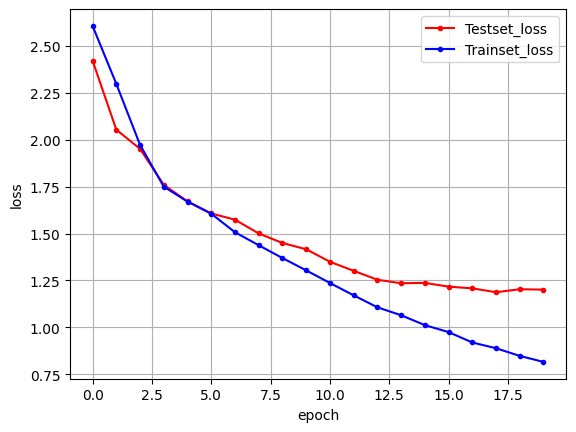

In [ ]:
#graph 
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker ='.', c='red', label ='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

plt.legend(loc ='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#Model accuracy: 70.48%
#Optimal learning time just before overfitting.